In [1]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the dataset
data_dir = '/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv'
data = pd.read_csv(data_dir)



In [2]:

Label = data["label"]
Data = data.drop(columns=["label"])

# Apply oversampling to address class imbalance
oversample = RandomOverSampler()
Data, Label = oversample.fit_resample(Data, Label)

# Reshape the data for CNN and normalize the pixel values
Data = np.array(Data).reshape(-1, 28, 28, 3) / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
num_classes = 7
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

testgen = ImageDataGenerator(rescale=1./255)



In [3]:
# Learning rate reduction callback
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Create the CNN model
model = keras.models.Sequential()

# Define the model architecture
model.add(keras.layers.Input(shape=[28, 28, 3]))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.25))

# Add more convolutional layers and fully connected layers as needed
model.add(keras.layers.GlobalAveragePooling2D())  # Global Average Pooling layer

model.add(keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform', name='classifier'))

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# ... (remaining code for training, evaluation, and saving the model)

# Make sure to experiment with the model architecture, data augmentation, and other hyperparameters to achieve the desired accuracy.


In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])


Epoch 1/25
294/294 [==============================] - 127s 427ms/step - loss: 1.3244 - accuracy: 0.5112 - val_loss: 1.7476 - val_accuracy: 0.3229 - lr: 0.0010
Epoch 2/25
294/294 [==============================] - 124s 421ms/step - loss: 1.0802 - accuracy: 0.5995 - val_loss: 1.1557 - val_accuracy: 0.5936 - lr: 0.0010
Epoch 3/25
294/294 [==============================] - 125s 425ms/step - loss: 0.9836 - accuracy: 0.6332 - val_loss: 0.9846 - val_accuracy: 0.6433 - lr: 0.0010
Epoch 4/25
294/294 [==============================] - 125s 426ms/step - loss: 0.9116 - accuracy: 0.6618 - val_loss: 0.9719 - val_accuracy: 0.6407 - lr: 0.0010
Epoch 5/25
294/294 [==============================] - 126s 427ms/step - loss: 0.8647 - accuracy: 0.6792 - val_loss: 0.9104 - val_accuracy: 0.6526 - lr: 0.0010
Epoch 6/25
294/294 [==============================] - 123s 419ms/step - loss: 0.8180 - accuracy: 0.7006 - val_loss: 0.7923 - val_accuracy: 0.7213 - lr: 0.0010
Epoch 7/25
294/294 [==========================

In [5]:
# Function to plot training history
def plot_training(hist):
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i + 1 for i in range(len(tr_acc))]

    loss_label = f'best epoch = {str(index_loss + 1)}'
    acc_label = f'best epoch = {str(index_acc + 1)}'
    
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [6]:
    plt.show()

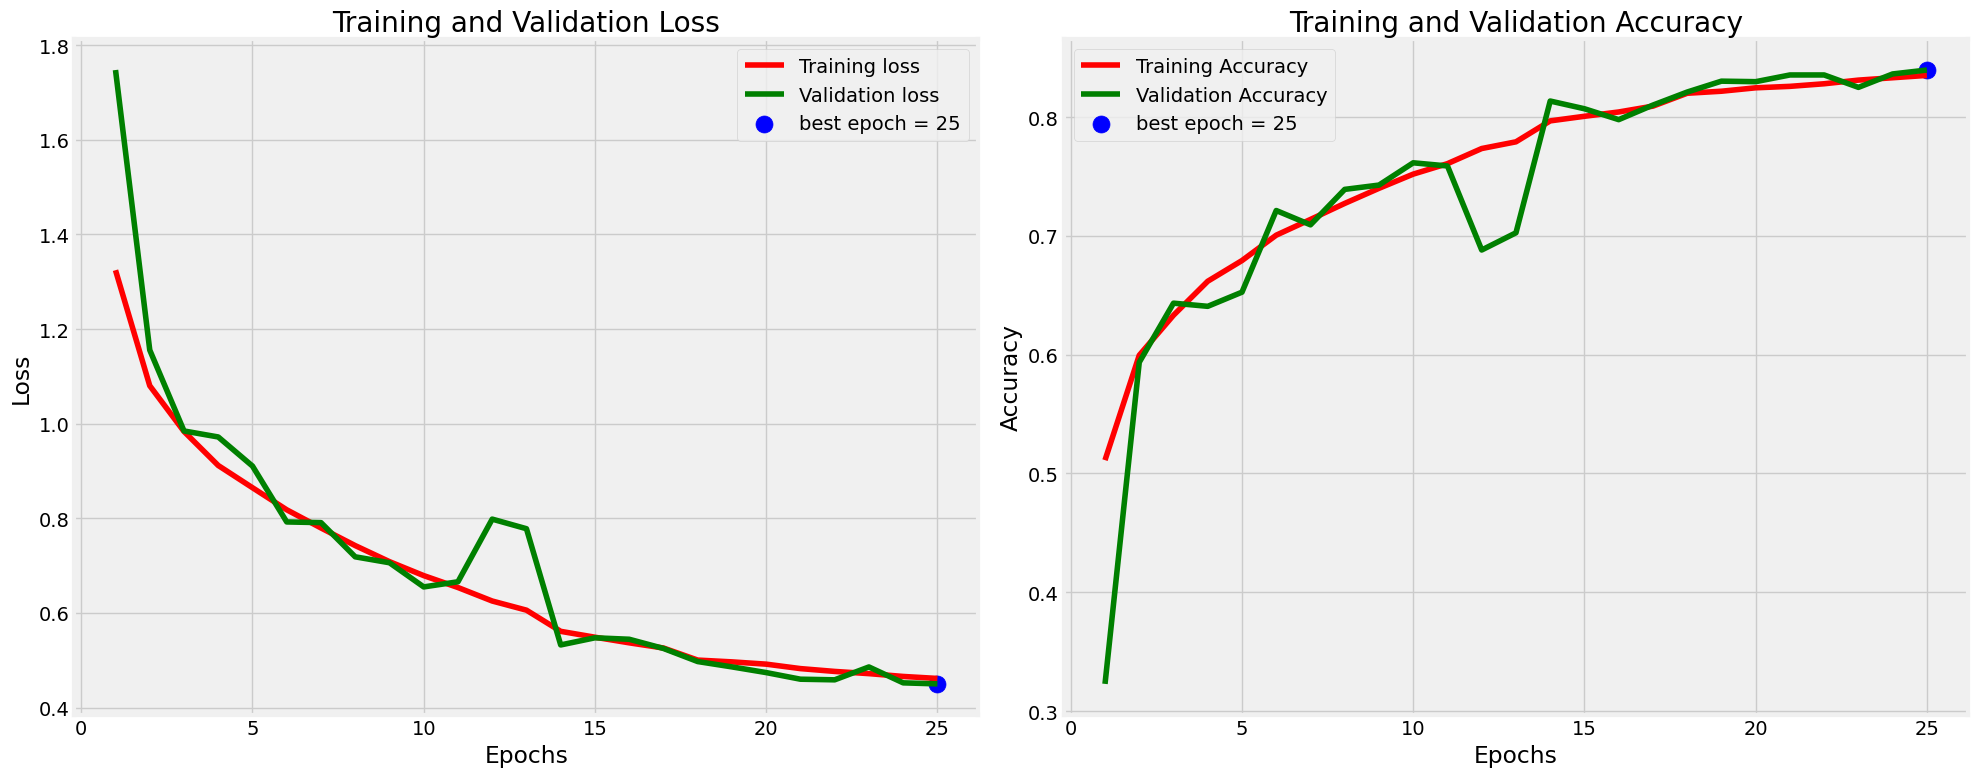

294/294 [==============================] - 7s 23ms/step - loss: 0.4500 - accuracy: 0.8396
Train Loss:  0.41547301411628723
Train Accuracy:  0.8550122380256653
--------------------
Test Loss:  0.4499991536140442
Test Accuracy:  0.8395653367042542
294/294 [==============================] - 7s 23ms/step


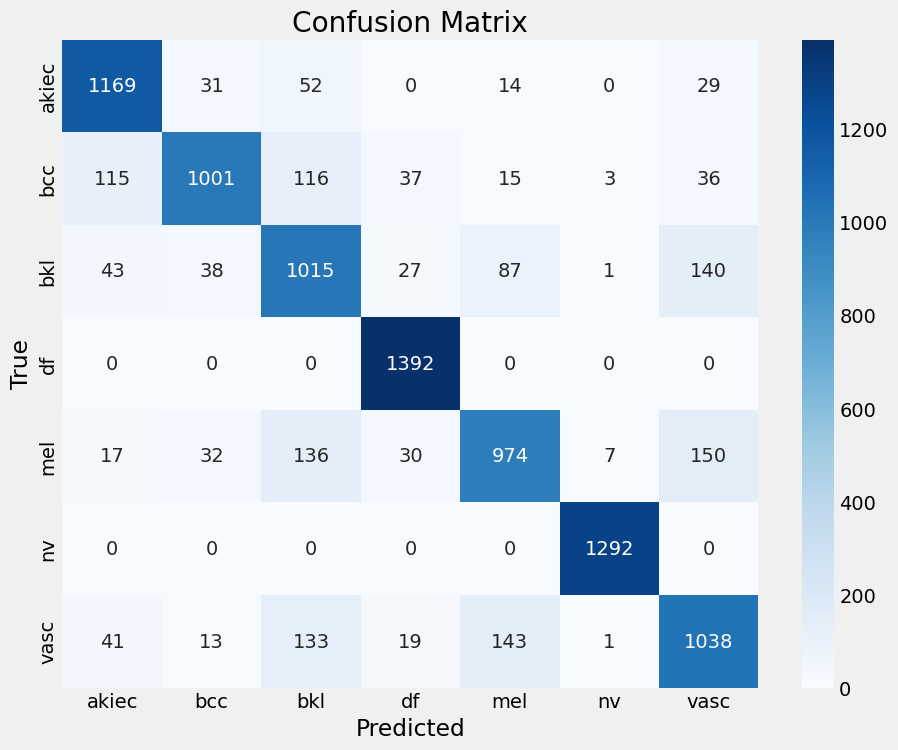

In [7]:
# Plot training history
plot_training(history)

# Evaluate the model on training and test sets
train_score = model.evaluate(X_train, y_train, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

# Get class labels
classes_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=classes_labels, yticklabels=classes_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


